# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and direc

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 2.데이터 가져오기

In [ ]:
df_drunkratio = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0구별 음주율.csv')
df_police = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울경찰서별 단속된 횟수.csv')
df_drunkacc = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0지역별 교통법규중 음주운전비율.csv')
df_caracc = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/1 (구별)교통사고 건수.csv')
df_caracc0 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/1 구별 차량 1만대당 교통사고 건수.csv')


# 서울 25개 자치구, 31개 경찰서, 426개 행정동

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울경찰서별 단속된 횟수.csv'

In [ ]:
df_drunkacc0 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0행정동코드별 사고건수.csv')
df_caught = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울경찰별 단속신상정보.csv')
df_localcode = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/행정동법정동한글버전.csv')
df_total_seoul = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0전처리 서울 음주사고 데이터.csv')

In [ ]:
df_total_seoul = df_total_seoul.rename(columns={
    '최근 2년 평균 교통사고건수': '교통사고건수',
    '차량 1만대당 사고건수': '교통사고건수 비율',
    '음주운전 비율': '음주운전 위법비율',
    '22년 음주단속수': '음주단속 검거수',
    '교통위법 총계':'교통위법 건수',
    '음주운전 위법 총계':'음주운전위법 건수'
})

In [ ]:
# 각 데이터프레임의 열 이름과 첫 번째 행의 값을 출력하는 함수
def print_column_names_and_first_row(dfs):
    for i, df in enumerate(dfs, 1):
        print(f"DataFrame {i}:")
        print("Columns:", df.columns.tolist())
        print("First Row:", df.iloc[0].tolist())
        print()

# dfs 지정
dfs=[df_total_seoul, df_caught, df_drunkacc0,  df_localcode]

# 함수 호출
print_column_names_and_first_row(dfs)

# 3.서울 음주 전체 데이터 상관분석

In [ ]:
df_total_seoul.head()

NameError: name 'df_total_seoul' is not defined

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


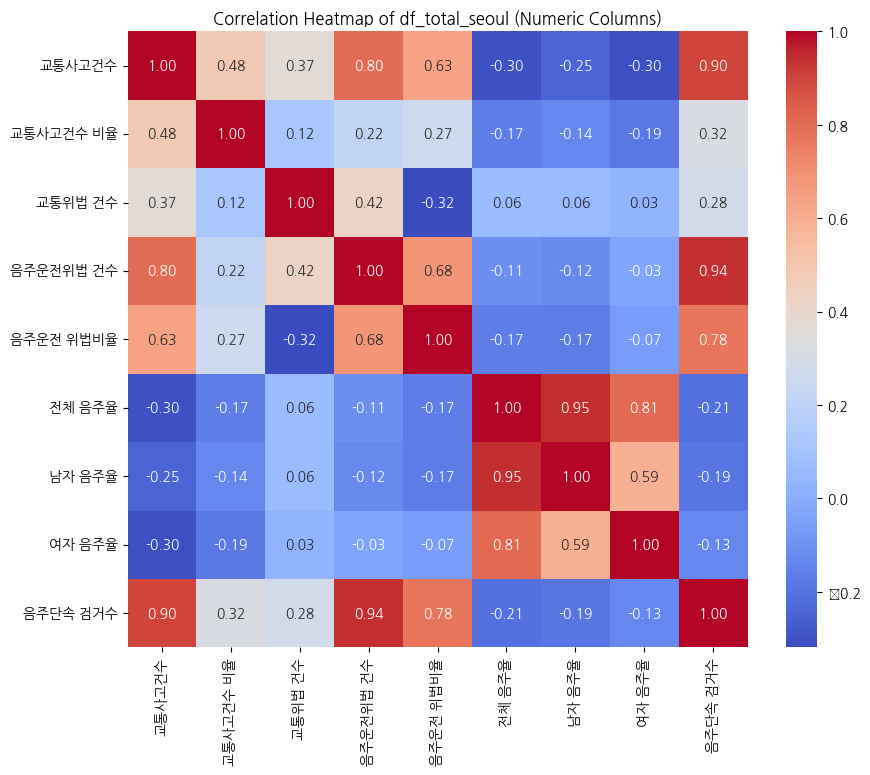

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 자치구 이름 열을 제외한 데이터프레임 생성
df_numeric = df_total_seoul.drop(columns=['자치구별'])

# 상관계수 계산
correlation_matrix = df_numeric.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of df_total_seoul (Numeric Columns)')
plt.show()


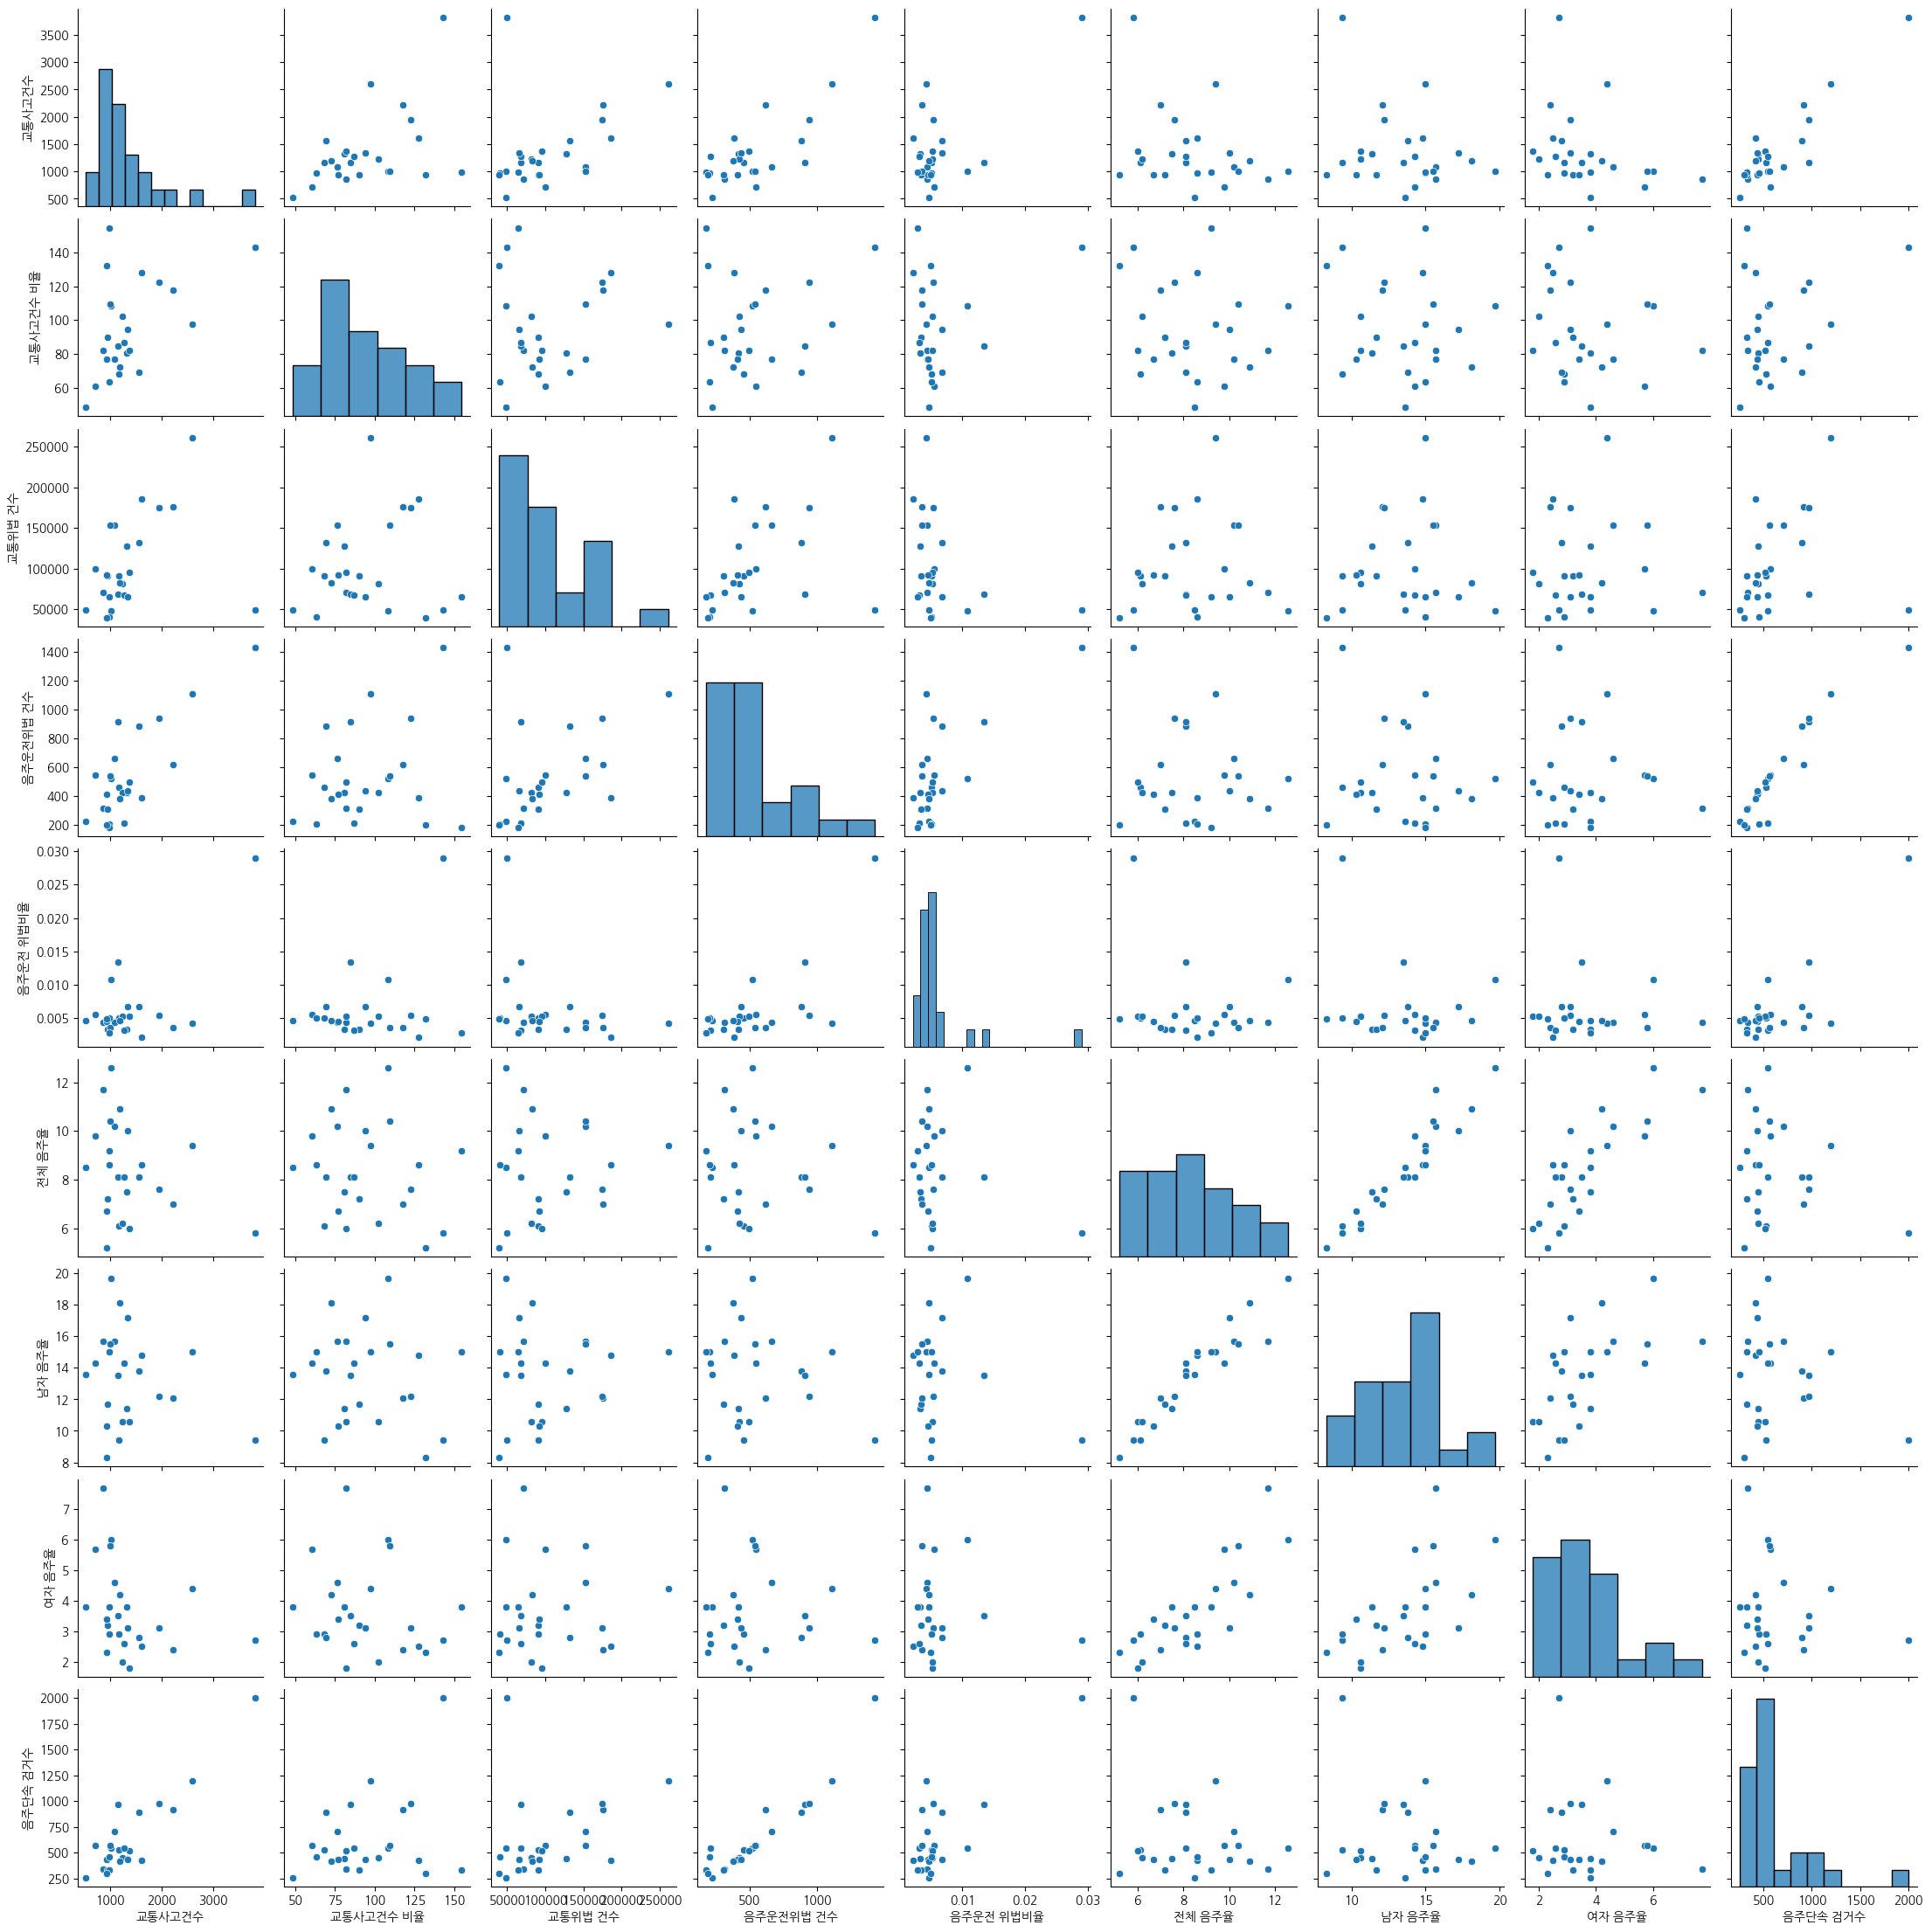

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 변수 선택
features = df_total_seoul[['교통사고건수', '교통사고건수 비율', '교통위법 건수', '음주운전위법 건수', '음주운전 위법비율', '전체 음주율', '남자 음주율', '여자 음주율', '음주단속 검거수']]

# 산점도를 포함한 쌍플롯 그리기
sns.pairplot(features)
plt.show()


남성 음주율이 높을수록 전체 음주율이 높음.


음주단속 건수가 높을수록 교통사고건수가 높음


음주단속 건수가 높을수록 음주운전 위법 수가 높음


In [ ]:
import pandas as pd
import statsmodels.api as sm

df=df_total_seoul.copy()

# 독립 변수와 종속 변수 설정
X = df[['교통사고건수',	'교통사고건수 비율',	'교통위법 건수',	'전체 음주율',	'남자 음주율',	'여자 음주율'	]]
y = df['음주단속 검거수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 구축 및 결과 요약
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               음주단속 검거수   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     20.59
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           3.75e-07
Time:                        06:53:37   Log-Likelihood:                -157.44
No. Observations:                  25   AIC:                             328.9
Df Residuals:                      18   BIC:                             337.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2737    210.017     -0.025      0.980    -446.504     435.956
교통사고건수         0.5456      0.062      8.791      0.000       0.415       0.676
교통사고건수 비율     -1.7558      1.365     -1.286      0.215      -4.624       1.112
교통위법 건수       -0.0003      0.001     -0.505      0.620      -0.002       0.001
전체 음주율      -471.1219    317.820     -1.482      0.156   -1138.837     196.593
남자 음주율       218.3820    154.065      1.417      0.173    -105.296     542.061
여자 음주율       299.6490    168.792      1.775      0.093     -54.970     654.268
==============================================================================
Omnibus:                        5.812   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.163
Skew:                           0.976   Prob(JB):                        0.125
Kurtosis:                       3.436   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

교통사고 건수는 유의미함

교통사고 건수비율, 교통위법 건수, 음주운전 위법비율은 유의미하지 않음.

여자 음주율은 경계선에 있음

In [ ]:
# 독립 변수와 종속 변수 설정
X = df[['교통사고건수',	'교통사고건수 비율','교통위법 건수','음주운전 위법비율',	'전체 음주율',	'남자 음주율',	'여자 음주율'	]]
y = df['음주운전위법 건수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 구축 및 결과 요약
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              음주운전위법 건수   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     34.83
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           7.22e-09
Time:                        16:17:49   Log-Likelihood:                -144.42
No. Observations:                  25   AIC:                             304.8
Df Residuals:                      17   BIC:                             314.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.3095    129.153     -0.552      0.588    -343.799     201.180
교통사고건수        -0.0546      0.076     -0.721      0.481      -0.214       0.105
교통사고건수 비율     -1.2058      0.847     -1.424      0.173      -2.992       0.581
교통위법 건수        0.0046      0.001      6.688      0.000       0.003       0.006
음주운전 위법비율   6.035e+04   8565.132      7.046      0.000    4.23e+04    7.84e+04
전체 음주율       -57.3923    195.100     -0.294      0.772    -469.017     354.232
남자 음주율        25.9140     94.479      0.274      0.787    -173.419     225.247
여자 음주율        22.9203    104.832      0.219      0.830    -198.256     244.096
==============================================================================
Omnibus:                        4.771   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.039
Skew:                          -0.121   Prob(JB):                        0.133
Kurtosis:                       4.954   Cond. No.                     5.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

유의미: 교통위법 건수, 음주운전 위법 비율


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 강동구, 구로구, 노원구, 도봉구, 동대문구, 동작구, 서대문구, 성동구, 성북구, 은평구, 종로구, 중구
Cluster 1: 강서구, 마포구, 서초구, 송파구, 영등포구
Cluster 2: 강북구, 관악구, 광진구, 금천구, 양천구, 용산구, 중랑구
Cluster 3: 강남구


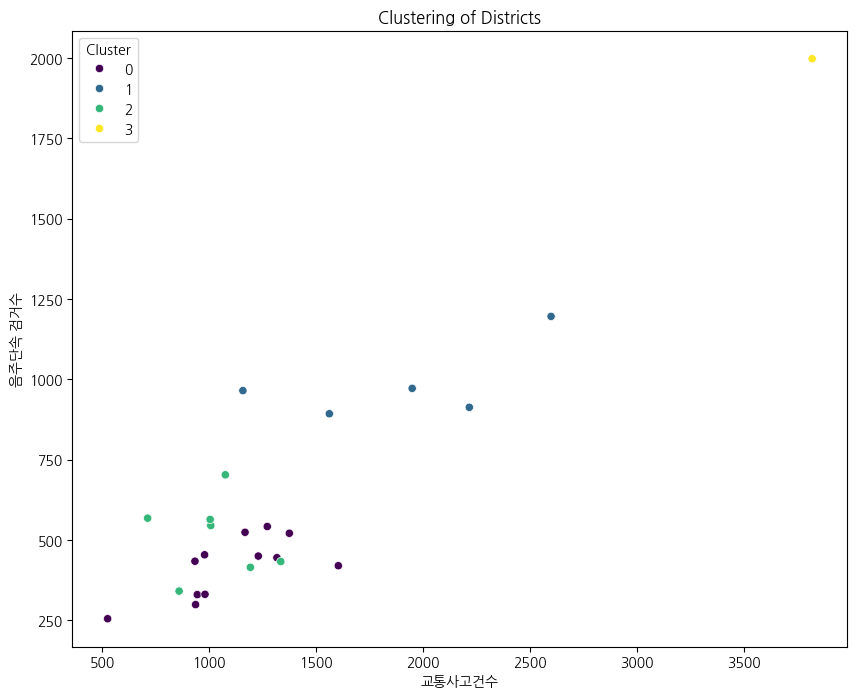

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 변수 선택
features = df[['교통사고건수', '음주운전위법 건수', '음주단속 검거수', '전체 음주율']]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 클러스터 개수 설정 (예시로 3개 사용)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# 클러스터링 수행
df['cluster'] = kmeans.fit_predict(scaled_features)

# 각 클러스터에 속한 자치구명 출력
for cluster in range(n_clusters):
    cluster_districts = df[df['cluster'] == cluster]['자치구별'].values
    print(f"Cluster {cluster}: {', '.join(cluster_districts)}")

# 클러스터 할당 결과 시각화 (주요 두 변수에 대한 2D 시각화)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='교통사고건수', y='음주단속 검거수', hue='cluster', palette='viridis')
plt.title('Clustering of Districts')
plt.xlabel('교통사고건수')
plt.ylabel('음주단속 검거수')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# 자치구명을 제외한 숫자형 데이터만 선택
numeric_df = df[['교통사고건수', '음주운전위법 건수', '음주단속 검거수', '전체 음주율', 'cluster']]

# 클러스터 그룹별 변수 평균 계산
cluster_means = numeric_df.groupby('cluster').mean()

# 클러스터 그룹별 변수 평균 출력
cluster_means

,교통사고건수,음주운전위법 건수,음주단속 검거수,전체 음주율
cluster,,,,
0,1105.666667,326.666667,417.083333,7.325
1,1896.600000,893.000000,987.800000,8.040
2,1027.142857,485.142857,509.857143,10.800
3,3818.000000,1428.000000,1998.000000,5.800


3: 음주율은 적으나 음주운전, 음주단속, 교통사고 가장 큼

0: 음주율 낮고 음주운전, 단속 수 작음, 교통사고 수 작음

2: 음주율 높으나 사고수 작음

1: 음주율 사고건수 모두 중앙

In [ ]:
# 차원축소
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 필요한 변수 선택
features = df[['교통사고건수','교통사고건수 비율','교통위법 건수','음주운전 위법비율',	'전체 음주율',	'남자 음주율',	'여자 음주율','음주단속 검거수']]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Explained variance ratio:


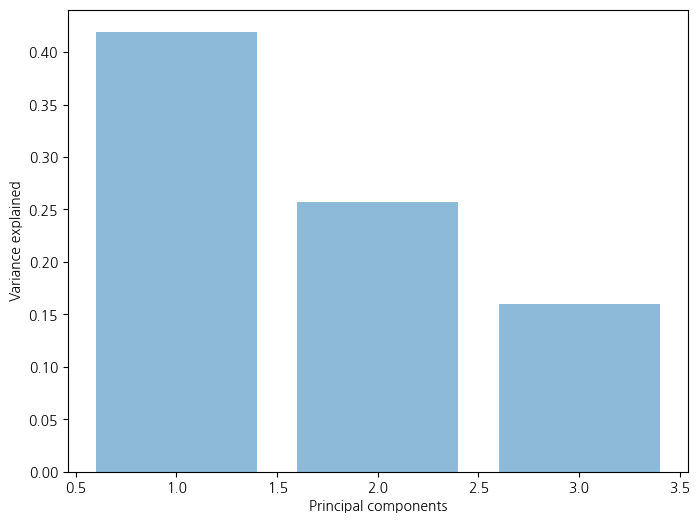

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 수행
pca = PCA(n_components=3)  # 예시로 2개의 주성분으로 차원 축소
principal_components = pca.fit_transform(scaled_features)

# PCA 결과 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])

# 설명된 분산 비율 출력
print("Explained variance ratio:")
pca.explained_variance_ratio_

# 설명된 분산 비율 시각화
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variance explained')
plt.xlabel('Principal components')
plt.show()



In [ ]:
# 고유벡터 확인
eigenvectors = pca.components_
eigenvectors_df = pd.DataFrame(data=eigenvectors, columns=features.columns, index=['PC1', 'PC2', 'PC3'])
print("Eigenvectors (Principal components):")
eigenvectors_df

Eigenvectors (Principal components):


,교통사고건수,교통사고건수 비율,교통위법 건수,음주운전 위법비율,전체 음주율,남자 음주율,여자 음주율,음주단속 검거수
PC1,0.453432,0.268785,0.062470,0.347777,-0.406201,-0.371705,-0.346550,0.417184
PC2,0.334093,0.175567,0.212918,0.307088,0.459539,0.428492,0.403567,0.400341
PC3,0.135563,0.124678,0.812007,-0.540164,-0.032586,-0.003706,-0.114186,-0.028848


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Cluster 0: 강북구, 관악구, 광진구, 금천구, 도봉구, 양천구, 용산구, 은평구, 종로구, 중랑구
Cluster 1: 강남구
Cluster 2: 강동구, 강서구, 구로구, 노원구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구, 영등포구, 중구


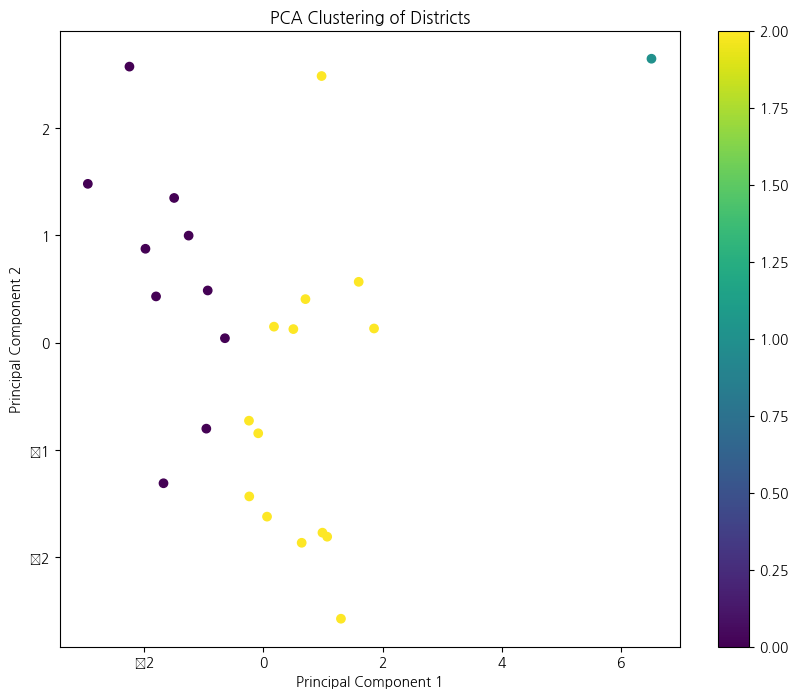

In [ ]:

# K-means 클러스터링 수행
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(principal_components)

# 각 클러스터에 속한 자치구명 출력
for cluster in range(n_clusters):
    cluster_districts = df[df['cluster'] == cluster]['자치구별'].values
    print(f"Cluster {cluster}: {', '.join(cluster_districts)}")

# 클러스터 할당 결과 시각화 (주요 두 변수에 대한 2D 시각화)
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('PCA Clustering of Districts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

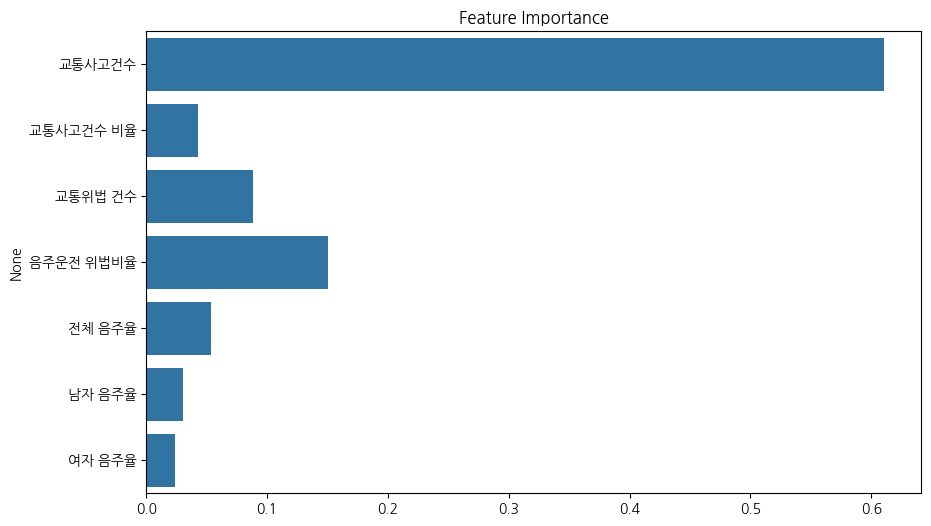

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 독립 변수와 종속 변수 설정
X = df[['교통사고건수','교통사고건수 비율','교통위법 건수','음주운전 위법비율',	'전체 음주율',	'남자 음주율',	'여자 음주율']]
y = df['음주단속 검거수']

# 랜덤 포레스트 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 피처 중요도 시각화
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [ ]:
!pip install shap



/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


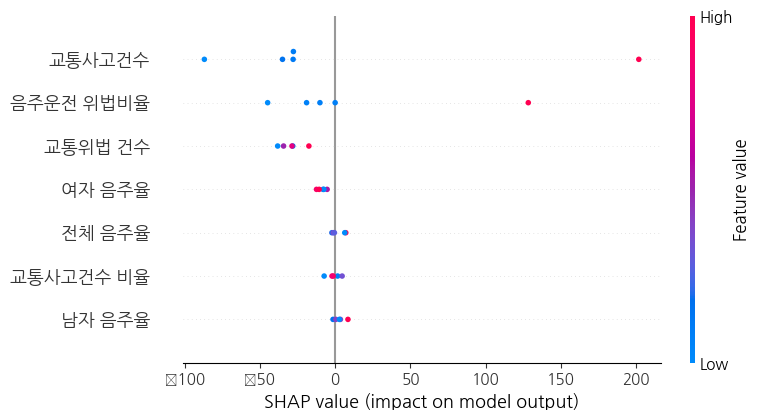

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features =df[['교통사고건수','교통사고건수 비율','교통위법 건수','음주운전 위법비율',	'전체 음주율',	'남자 음주율',	'여자 음주율']]
target =df['음주단속 검거수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# SHAP 분석
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, feature_names=features.columns)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


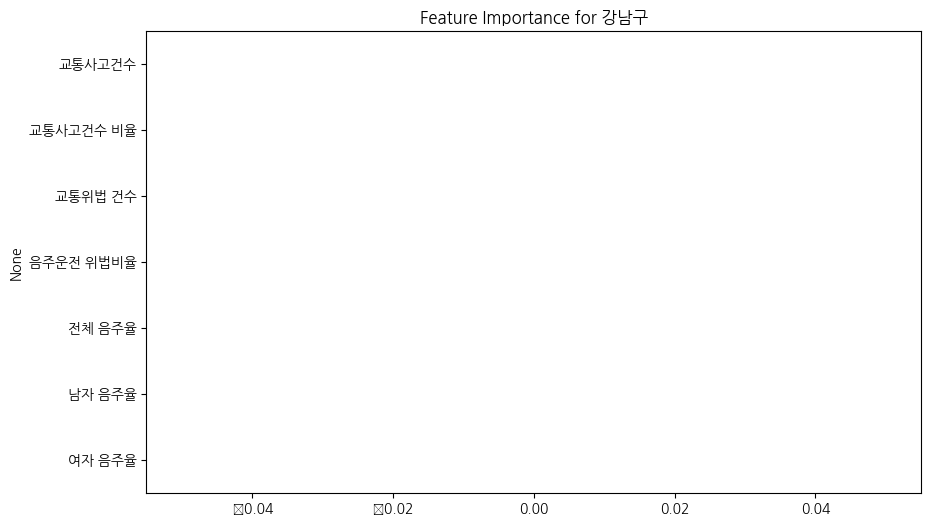

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 지역 리스트
regions = df['자치구별'].unique()

# 지역별 피처 중요도 분석 결과 저장
feature_importances = {}


for region in regions:
    region_data = df[df['자치구별'] == region]
    X = region_data[['교통사고건수','교통사고건수 비율','교통위법 건수','음주운전 위법비율',	'전체 음주율',	'남자 음주율',	'여자 음주율']]
    y = region_data['음주단속 검거수']

    # 랜덤 포레스트 모델 훈련
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # 피처 중요도 저장
    feature_importances[region] = model.feature_importances_

# 결과 시각화 (예시로 첫 번째 지역 결과 시각화)
region = regions[0]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[region], y=X.columns)
plt.title(f'Feature Importance for {region}')
plt.show()


# 4.음주운전 신상정보

In [ ]:
# 적발 횟수를 모두 1로 설정
df_caught['적발횟수'] = 1

In [ ]:
# 시간대를 범주로 분류
def time_category(hour):
    if 0 <= hour < 4:
        return 'Late Night'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'

df_caught['시간대'] = df_caught['측정시간'].apply(time_category)

In [ ]:
df_caught.head()

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서,연령대,측정일,측정월,측정요일,측정시간,시간대
0,남자,1,27.0,0.128,2022-01-01 00:04:00,서울마포경찰서,20대,2022-01-01,1,Saturday,0,Late Night
1,남자,1,49.0,0.092,2022-01-01 00:22:00,서울송파경찰서,40대,2022-01-01,1,Saturday,0,Late Night
2,남자,1,28.0,0.152,2022-01-01 01:20:00,서울성동경찰서,20대,2022-01-01,1,Saturday,1,Late Night
3,남자,1,37.0,0.085,2022-01-01 01:30:00,서울마포경찰서,30대,2022-01-01,1,Saturday,1,Late Night
4,남자,1,34.0,0.078,2022-01-01 01:39:00,서울용산경찰서,30대,2022-01-01,1,Saturday,1,Late Night


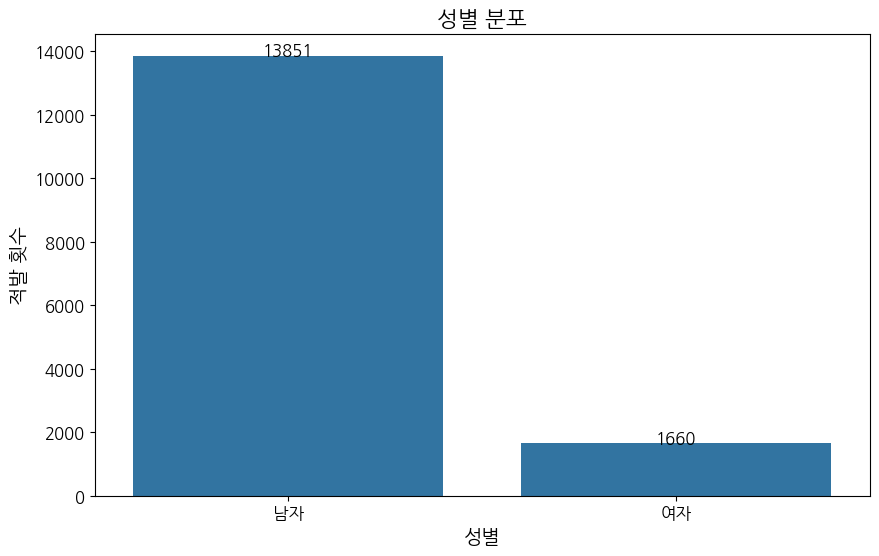

In [ ]:
# 성별 막대 그래프
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_caught, x='성별')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha="center", fontsize=12)
plt.title('성별 분포', fontsize=16)
plt.xlabel('성별', fontsize=14)
plt.ylabel('적발 횟수', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


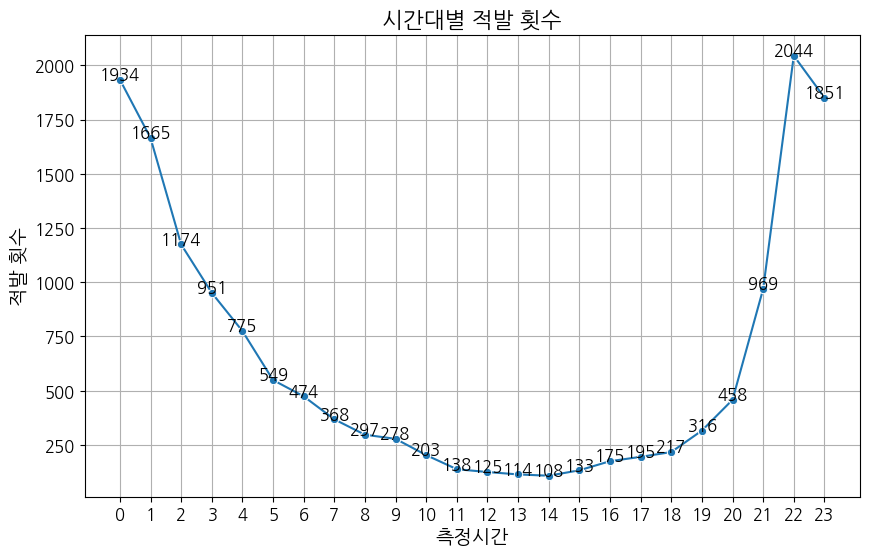

In [ ]:
# 시간대별 꺾은선 그래프
time_data = df_caught.groupby('측정시간')['적발횟수'].sum().reset_index()

plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=time_data, x='측정시간', y='적발횟수', marker='o')
for x, y in zip(time_data['측정시간'], time_data['적발횟수']):
    ax.text(x, y + 0.1, f'{int(y)}', ha='center', fontsize=12)

plt.title('시간대별 적발 횟수', fontsize=16)
plt.xlabel('측정시간', fontsize=14)
plt.ylabel('적발 횟수', fontsize=14)

plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()


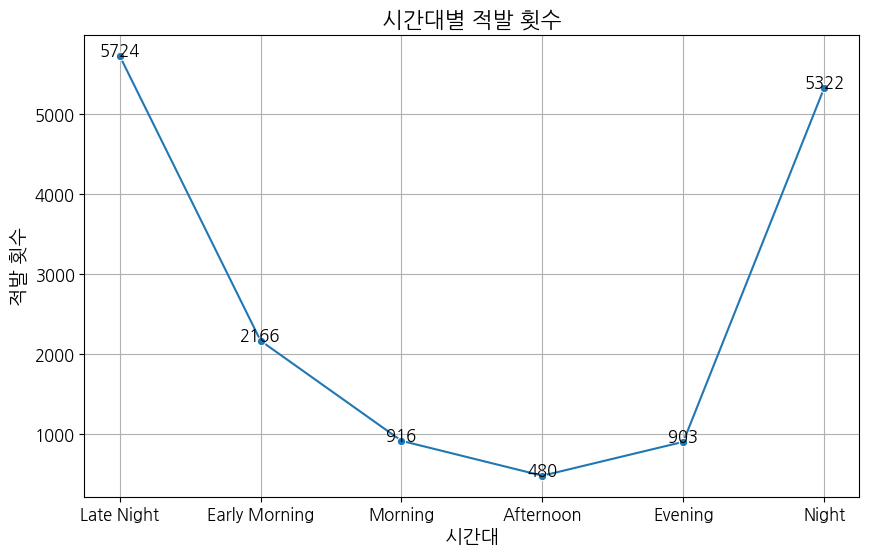

In [ ]:
# 시간대별 적발 횟수 꺾은선 그래프
time_data = df_caught.groupby('시간대')['적발횟수'].sum().reindex(['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=time_data, x='시간대', y='적발횟수', marker='o')
for x, y in zip(time_data['시간대'], time_data['적발횟수']):
    ax.text(x, y + 0.1, f'{int(y)}', ha='center', fontsize=12)
plt.title('시간대별 적발 횟수', fontsize=16)
plt.xlabel('시간대', fontsize=14)
plt.ylabel('적발 횟수', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


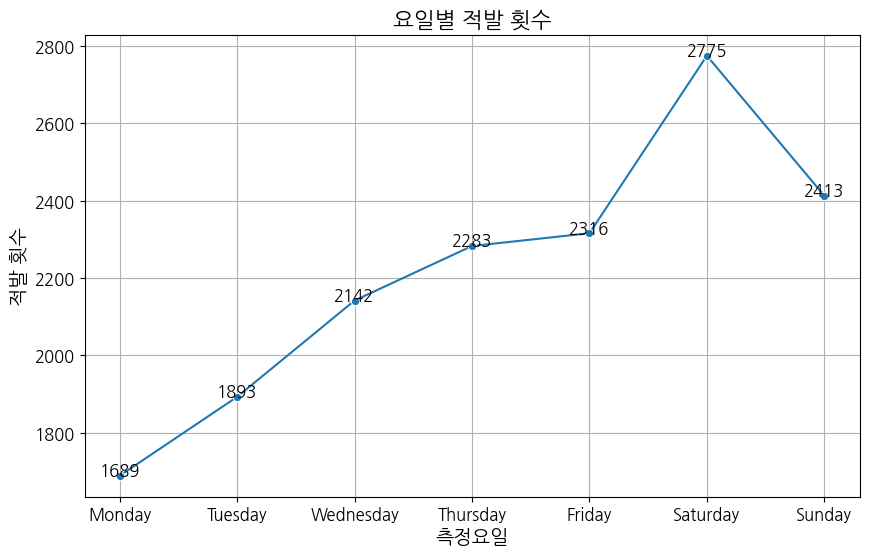

In [ ]:
# 요일별 꺾은선 그래프
day_data = df_caught.groupby('측정요일')['적발횟수'].sum().reset_index()

# 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data['측정요일'] = pd.Categorical(day_data['측정요일'], categories=weekday_order, ordered=True)
day_data = day_data.sort_values('측정요일')

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=day_data, x='측정요일', y='적발횟수', marker='o')
for x, y in zip(day_data['측정요일'], day_data['적발횟수']):
    ax.text(x, y + 0.1, f'{int(y)}', ha='center', fontsize=12)
plt.title('요일별 적발 횟수', fontsize=16)
plt.xlabel('측정요일', fontsize=14)
plt.ylabel('적발 횟수', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


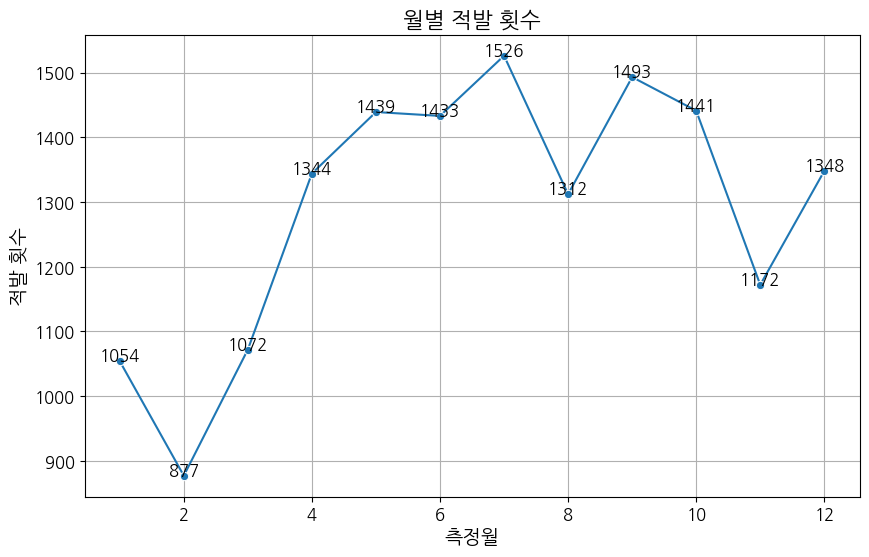

In [ ]:
# 월별 꺾은선 그래프
month_data = df_caught.groupby('측정월')['적발횟수'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=month_data, x='측정월', y='적발횟수', marker='o')
for x, y in zip(month_data['측정월'], month_data['적발횟수']):
    ax.text(x, y + 0.1, f'{int(y)}', ha='center', fontsize=12)
plt.title('월별 적발 횟수', fontsize=16)
plt.xlabel('측정월', fontsize=14)
plt.ylabel('적발 횟수', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


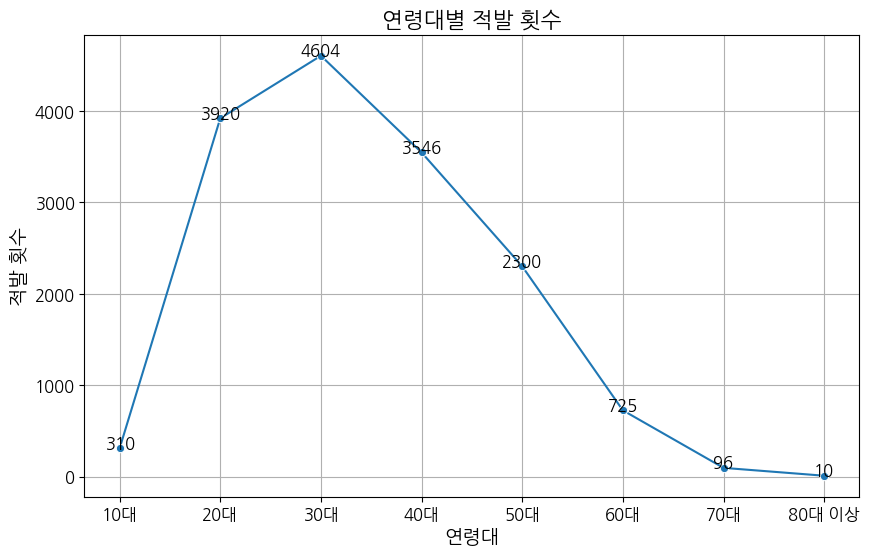

In [ ]:
# 연령대별 꺾은선 그래프
age_data = df_caught.groupby('연령대')['적발횟수'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=age_data, x='연령대', y='적발횟수', marker='o')
for x, y in zip(age_data['연령대'], age_data['적발횟수']):
    ax.text(x, y + 0.1, f'{int(y)}', ha='center', fontsize=12)
plt.title('연령대별 적발 횟수', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('적발 횟수', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
